In [ ]:
pip install openai

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import os
import openai
openai.api_key = os.getenv("blah")
openai.api_key = "blah"

In [ ]:
prompt_text= "\nQuestion: Is it okay to read a book at a bar?\nAnswer: Sure, unless you do not mind getting beaten up.\nChoose the correct interpretation: yes, no, probably yes, probably no, unknown."


In [ ]:
# temp_text=few_shots+'\n'+prompt_text
# print(temp_text)
print(prompt_text)


Question: Is it okay to read a book at a bar?
Answer: Sure, unless you do not mind getting beaten up.
Choose the correct interpretation: yes, no, probably yes, probably, unknown.


In [ ]:
response = openai.Completion.create(
engine="text-davinci-002",
# engine="davinci",
# engine="gpt-3.5-turbo",
prompt=prompt_text,
temperature=0.7,
max_tokens=32,
top_p=1,
frequency_penalty=0,
presence_penalty=0
)

print(response.choices[0].text)



Yes


In [ ]:
import pandas as pd
df=pd.read_csv("TE_a.csv")
df=df.astype(str)

In [ ]:
df['prompt']='Question: ' + df['Main_tweet'] + '\n' + 'Answer:'+df['Reply_tweet'] + '\nWhat does the given answer mean? Choose only from the following options: yes, probably yes, no, probably no, unknown.'

In [ ]:
print(df['prompt'][0])

Question: Do you think student loans should be forgiven?
Answer: no, unless there is a period of service to uncle sam in return.
What does the given answer mean? Choose only from the following options: yes, probably yes, no, probably no, unknown.


In [1]:
def get_gen_text(prompt_text):

  response = openai.Completion.create(
  engine="text-davinci-002",
  prompt=prompt_text,
  temperature=0.7,
  max_tokens=32,
  top_p=1,
  frequency_penalty=0,
  presence_penalty=0)



#   print(len(prompt_text))
#   print(response.choices[0].text)
#    print(response.choices[0].text)

  return response.choices[0].text

df['gpt3_out'] = df['prompt'].apply(lambda x: get_gen_text(x))


In [ ]:
df['gold_adj'].value_counts()

y     236
n     155
uk    109
py     69
pn     31
Name: gold_adj, dtype: int64

In [ ]:
import re

In [ ]:
df['gpt3_out'] = df['gpt3_out'].str.lower()
df['gpt3_out'] = df['gpt3_out'].str.replace('\n','')

In [ ]:
df['gpt3_out'].value_counts()

no                                                                                                                                                                 214
unknown                                                                                                                                                            143
yes                                                                                                                                                                 65
 probably yes                                                                                                                                                       23
 probably no                                                                                                                                                        22
probably yes                                                                                                                                                        1

In [ ]:
def ans_eng(gpt3_out):
  if len(re.findall('probably yes', gpt3_out)):
    return 'py'
  if len(re.findall('probably no', gpt3_out)):
    return 'pn'
  if len(re.findall('yes', gpt3_out)):
    return 'y'
  if len(re.findall('unknown', gpt3_out)):
    return 'uk'
  if len(re.findall('no', gpt3_out)):
    return 'n'
  else:
    return 'uk'

In [ ]:
df['gpt3_ans_eng'] = df['gpt3_out'].apply(lambda x: ans_eng(x))


In [ ]:
df['gpt3_ans_eng'].value_counts()

n     224
uk    159
y     109
py     59
pn     49
Name: gpt3_ans_eng, dtype: int64

In [ ]:
from sklearn.metrics import classification_report
print('Model: GPT3 (text-davinci-002) few-shot')
print(classification_report(y_true = df['gold_adj'], y_pred = df['gpt3_ans_eng']))


Model: GPT3 (3.5) (text-davinci-002) few-shot
              precision    recall  f1-score   support

           n       0.43      0.63      0.51       155
          pn       0.10      0.16      0.13        31
          py       0.17      0.14      0.16        69
          uk       0.36      0.52      0.43       109
           y       0.89      0.41      0.56       236

    accuracy                           0.44       600
   macro avg       0.39      0.37      0.36       600
weighted avg       0.55      0.44      0.46       600



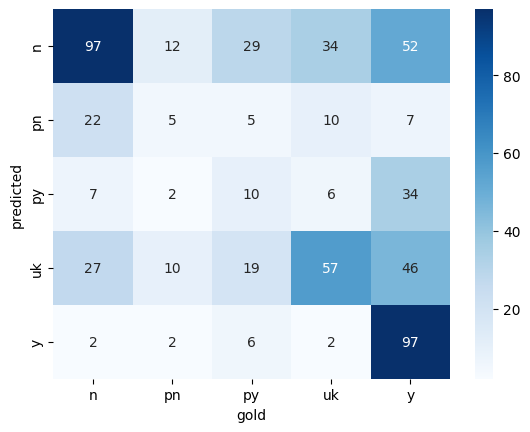

gold        n  pn  py  uk   y
predicted                    
n          97  12  29  34  52
pn         22   5   5  10   7
py          7   2  10   6  34
uk         27  10  19  57  46
y           2   2   6   2  97


In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

confusion_matrix = pd.crosstab(df['gpt3_ans_eng'],df['gold_adj'],rownames=['predicted'], colnames=['gold'])

sns.heatmap(confusion_matrix,annot=True,cmap='Blues', fmt='g')
plt.show()
print(confusion_matrix)

In [ ]:
df['result']=df['gpt3_ans_eng']

In [ ]:
df

,Unnamed: 0,Main_Tweet_ID,Reply_id,temporal_setting,Main_tweet,Reply_tweet,gold_1,gold_2,gold_adj,prompt,gpt3_out,gpt3_ans_eng,result
0,0,1529794531897614337,1529797807695138816,new,Do you think student loans should be forgiven?,"no, unless there is a period of service to un...",pn,n,pn,Question: Do you think student loans should be...,no,n,n
1,1,1529578923331358722,1529584546102095872,new,Is it bad if your fart sounds gurgly?,don't know about bad...dangerous...yup,py,uk,py,Question: Is it bad if your fart sounds gurgly...,unknown,uk,uk
2,2,1533912514131640321,1533933413840961536,new,Do you have confidence in the Prime Minister?,move on gmb. time to let our country heal.,py,py,py,Question: Do you have confidence in the Prime ...,no,n,n
3,3,1506565419313868802,1506566897428582406,new,"My name regularly gets autocorrected to ""Satan...",i once had a boss who autocorrected to piglet,y,y,y,Question: My name regularly gets autocorrected...,unknown,uk,uk
4,4,1517175103682973697,1517182016730517509,new,Do you have a calling in your life?,"well i should hope so, otherwise there'd be b...",py,py,py,Question: Do you have a calling in your life?\...,no,n,n
...,...,...,...,...,...,...,...,...,...,...,...,...,...
595,595,1522018378998853633,1522020091482689536,new,"I tend to go back and forth on this, do you li...","honestly, portal + nil is probably donu’s bes...",py,py,py,"Question: I tend to go back and forth on this,...",no,n,n
596,596,1509976642575212544,1510013316726501382,new,Is it ever okay to reject a job offer after ac...,"yes, but you have to do it correctly.",py,y,y,Question: Is it ever okay to reject a job offe...,"the answer means ""yes.""",y,y
597,597,1509627464292704256,1509685227047718914,new,"Do you, on a deep level, feel loved?",who are the no's 😭 let me love you!,y,uk,uk,"Question: Do you, on a deep level, feel loved?...",the answer is probably yes.,py,py
598,598,1528328624385974272,1528330816069292035,new,Don't offer advice unless you were asked. Can'...,"but, i did not ask for your advice.",y,uk,uk,Question: Don't offer advice unless you were a...,no,n,n
